In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [4]:
data = pd.read_csv("../features/data_colombia_completa_2.csv", sep=";")

In [45]:
data

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases,tasa_dengue_mensual,code,tasa_dengue_promedio,tasa_dengue_promedio_x10000_hab
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,5001|2007,2286126,5,4.374212e-07,5001,0.000140,1.398562
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,5002|2007,20643,0,0.000000e+00,5002,0.000030,0.298171
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,5004|2007,2261,0,0.000000e+00,5004,0.000017,0.169010
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,5021|2007,3935,0,0.000000e+00,5021,0.000018,0.175392
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,5030|2007,27996,0,0.000000e+00,5030,0.000158,1.582632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,97889|2018,1048,0,0.000000e+00,97889,0.000011,0.111717
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,99001|2018,20936,5,0.000000e+00,99001,0.000368,3.677812
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,99524|2018,10122,3,0.000000e+00,99524,0.000251,2.512306
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,99624|2018,4059,0,0.000000e+00,99624,0.000382,3.818935


In [47]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161244 entries, 0 to 161423
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Municipality code                161244 non-null  int64  
 1   Municipality                     161244 non-null  object 
 2   Date                             161244 non-null  object 
 3   temperature                      161244 non-null  float64
 4   month_str                        161244 non-null  object 
 5   month                            161244 non-null  int64  
 6   year                             161244 non-null  int64  
 7   concat_code_year_month           161244 non-null  object 
 8   precipitation                    161244 non-null  float64
 9   cases                            161244 non-null  int64  
 10  concat_code_year                 161244 non-null  object 
 11  population                       161244 non-null  int64  
 12  ye

In [49]:
grouped_data = data.groupby(["Municipality code", "Municipality"]).mean().reset_index()
grouped_data

,Municipality code,Municipality,temperature,month,year,precipitation,cases,population,year_cases,tasa_dengue_mensual,code,tasa_dengue_promedio,tasa_dengue_promedio_x10000_hab
0,5001,Medellín,21.340676,6.5,2012.5,215.999797,335.215278,2.385786e+06,4022.583333,0.000140,5001.0,0.000140,1.398562
1,5002,Abejorral,16.827754,6.5,2012.5,214.766886,0.631944,2.041642e+04,7.583333,0.000030,5002.0,0.000030,0.298171
2,5004,Abriaquí,17.405518,6.5,2012.5,195.418024,0.041667,2.444583e+03,0.500000,0.000017,5004.0,0.000017,0.169010
3,5021,Alejandría,21.150612,6.5,2012.5,231.723918,0.076389,4.330833e+03,0.916667,0.000018,5021.0,0.000018,0.175392
4,5030,Amagá,21.087729,6.5,2012.5,204.113680,4.569444,2.874842e+04,54.833333,0.000158,5030.0,0.000158,1.582632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,97889,Yavaraté,25.958655,6.5,2012.5,290.312062,0.013889,1.047833e+03,0.166667,0.000011,97889.0,0.000011,0.111717
1116,99001,Puerto Carreño,28.531224,6.5,2012.5,206.842979,6.131944,1.799125e+04,73.583333,0.000368,99001.0,0.000368,3.677812
1117,99524,La Primavera,28.034144,6.5,2012.5,212.595374,1.958333,8.143250e+03,23.500000,0.000251,99524.0,0.000251,2.512306
1118,99624,Santa Rosalía,27.362065,6.5,2012.5,218.526414,1.597222,4.044000e+03,19.166667,0.000382,99624.0,0.000382,3.818935


In [50]:
for col in data:
    print(f"'{col}',")

'Municipality code',
'Municipality',
'Date',
'temperature',
'month_str',
'month',
'year',
'concat_code_year_month',
'precipitation',
'cases',
'concat_code_year',
'population',
'year_cases',
'tasa_dengue_mensual',
'code',
'tasa_dengue_promedio',
'tasa_dengue_promedio_x10000_hab',


In [51]:
features = [
#     'Municipality',
    'temperature',
    'precipitation',
    'population',
    'year_cases',
    'tasa_dengue_promedio'
]

### Scaling the data 

In [52]:
X_orig = grouped_data[features]
X_orig

,temperature,precipitation,population,year_cases,tasa_dengue_promedio
0,21.340676,215.999797,2.385786e+06,4022.583333,0.000140
1,16.827754,214.766886,2.041642e+04,7.583333,0.000030
2,17.405518,195.418024,2.444583e+03,0.500000,0.000017
3,21.150612,231.723918,4.330833e+03,0.916667,0.000018
4,21.087729,204.113680,2.874842e+04,54.833333,0.000158
...,...,...,...,...,...
1115,25.958655,290.312062,1.047833e+03,0.166667,0.000011
1116,28.531224,206.842979,1.799125e+04,73.583333,0.000368
1117,28.034144,212.595374,8.143250e+03,23.500000,0.000251
1118,27.362065,218.526414,4.044000e+03,19.166667,0.000382


In [54]:
scaler = StandardScaler()
scaler.fit(X_orig)
X = scaler.transform(X_orig)

In [55]:
print(X.shape)
X

(1120, 5)


array([[-0.02482356,  0.5548663 ,  9.57540956, 12.351071  ,  0.13940902],
       [-0.81600031,  0.53875405, -0.08219183, -0.17632727, -0.56665992],
       [-0.71471052,  0.28589422, -0.1555693 , -0.19842833, -0.64953642],
       ...,
       [ 1.14863286,  0.51037575, -0.13230212, -0.1266649 ,  0.85404612],
       [ 1.03080832,  0.5878853 , -0.14903901, -0.14018555,  1.69244777],
       [ 0.99900779,  0.62651372,  0.01317281, -0.06244183, -0.13849747]])

### Fitting the model

#### Select an adecuated number of centroids

In [91]:
ks = range(1, 10)
distances = []
for k in ks:
    kmean_actual = KMeans(k).fit(X)
    distances.append(kmean_actual.inertia_)

C:\Users\carlpome\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


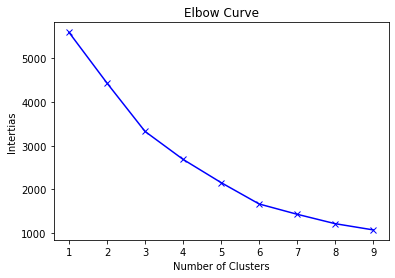

In [103]:
plt.plot(ks, distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertias')
plt.title('Elbow Curve')
plt.show()

#### Fitting the model with the chosen number of centroids

In [94]:
k = 6
kmeans = KMeans(n_clusters=k).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[-1.12609640e+00 -4.98851134e-01 -7.57632656e-02 -1.74117497e-01
  -5.76050815e-01]
 [ 6.61807330e-01  6.92503024e-02 -5.02025706e-02 -9.60125969e-02
  -1.40972210e-01]
 [ 8.84426950e-01  3.85204423e+00 -6.64491757e-02 -1.71562721e-01
  -5.52395648e-01]
 [-2.38478408e+00 -7.44845215e-01  2.90504897e+01 -1.03003771e-01
  -7.55674519e-01]
 [ 4.36264079e-01  1.22862759e-01 -2.27835162e-02  2.61907219e-01
   1.77704038e+00]
 [ 5.43301441e-01 -1.35514545e-01  4.08140620e+00  9.76771763e+00
   1.34004064e+00]]


In [95]:
labels = kmeans.predict(X)

<AxesSubplot:ylabel='Count'>

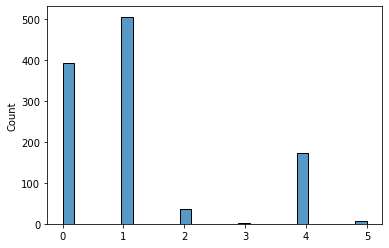

In [96]:
sns.histplot(labels)

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,concat_code_year,population,year_cases,tasa_dengue_mensual,code,tasa_dengue_promedio,tasa_dengue_promedio_x10000_hab
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,5001|2007,2286126,5,4.374212e-07,5001,0.000140,1.398562
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,5002|2007,20643,0,0.000000e+00,5002,0.000030,0.298171
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,5004|2007,2261,0,0.000000e+00,5004,0.000017,0.169010
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,5021|2007,3935,0,0.000000e+00,5021,0.000018,0.175392
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,5030|2007,27996,0,0.000000e+00,5030,0.000158,1.582632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161419,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,97889|2018,1048,0,0.000000e+00,97889,0.000011,0.111717
161420,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,99001|2018,20936,5,0.000000e+00,99001,0.000368,3.677812
161421,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,99524|2018,10122,3,0.000000e+00,99524,0.000251,2.512306
161422,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,99624|2018,4059,0,0.000000e+00,99624,0.000382,3.818935


In [100]:
len(labels)

1120

In [102]:
grouped_data["cluster_id"] = labels
grouped_data

,Municipality code,Municipality,temperature,month,year,precipitation,cases,population,year_cases,tasa_dengue_mensual,code,tasa_dengue_promedio,tasa_dengue_promedio_x10000_hab,cluster_id
0,5001,Medellín,21.340676,6.5,2012.5,215.999797,335.215278,2.385786e+06,4022.583333,0.000140,5001.0,0.000140,1.398562,5
1,5002,Abejorral,16.827754,6.5,2012.5,214.766886,0.631944,2.041642e+04,7.583333,0.000030,5002.0,0.000030,0.298171,0
2,5004,Abriaquí,17.405518,6.5,2012.5,195.418024,0.041667,2.444583e+03,0.500000,0.000017,5004.0,0.000017,0.169010,0
3,5021,Alejandría,21.150612,6.5,2012.5,231.723918,0.076389,4.330833e+03,0.916667,0.000018,5021.0,0.000018,0.175392,1
4,5030,Amagá,21.087729,6.5,2012.5,204.113680,4.569444,2.874842e+04,54.833333,0.000158,5030.0,0.000158,1.582632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,97889,Yavaraté,25.958655,6.5,2012.5,290.312062,0.013889,1.047833e+03,0.166667,0.000011,97889.0,0.000011,0.111717,1
1116,99001,Puerto Carreño,28.531224,6.5,2012.5,206.842979,6.131944,1.799125e+04,73.583333,0.000368,99001.0,0.000368,3.677812,4
1117,99524,La Primavera,28.034144,6.5,2012.5,212.595374,1.958333,8.143250e+03,23.500000,0.000251,99524.0,0.000251,2.512306,1
1118,99624,Santa Rosalía,27.362065,6.5,2012.5,218.526414,1.597222,4.044000e+03,19.166667,0.000382,99624.0,0.000382,3.818935,4


## TSNe visualization

In [105]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X) 

C:\Users\carlpome\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\carlpome\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1120 samples in 0.003s...
[t-SNE] Computed neighbors for 1120 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1120
[t-SNE] Computed conditional probabilities for sample 1120 / 1120
[t-SNE] Mean sigma: 0.224701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.087791
[t-SNE] KL divergence after 1000 iterations: 0.582554


In [162]:
df = pd.DataFrame()
df["cluster"] = labels
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["Municipality"] = grouped_data["Municipality"]

In [165]:
df = df[['Municipality', 'comp-1', 'comp-2', 'cluster']]
df

,Municipality,comp-1,comp-2,cluster
0,Medellín,-13.489945,-14.838072,5
1,Abejorral,17.047544,22.052998,0
2,Abriaquí,13.976257,20.510389,0
3,Alejandría,18.092785,-3.184097,1
4,Amagá,3.199189,5.159574,1
...,...,...,...,...
1115,Yavaraté,20.991049,-20.179537,1
1116,Puerto Carreño,-18.723736,-22.524542,4
1117,La Primavera,-8.331185,-23.576637,1
1118,Santa Rosalía,-20.245979,-22.365007,4


In [167]:
fig = px.scatter(df, x="comp-1", y="comp-2", color="cluster",
                 labels={
                     "Municipality": "Municipio",
                     "Municipio": "Municipality"
                 },
                title="Manually Specified Labels")
fig.show()

In [158]:
fig = px.scatter(df, x="comp-1", y="comp-2", color="y", symbol="y", labels = {'Municipio':"Municipality"})
fig.show()

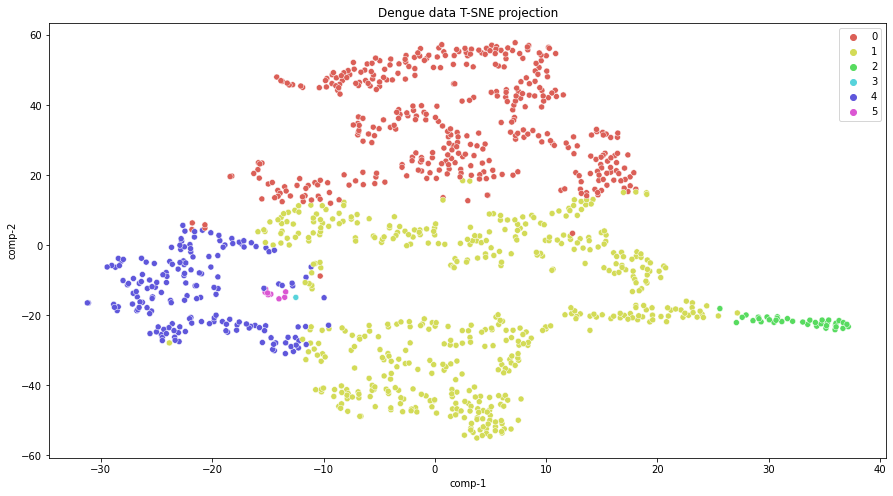

In [114]:
plt.subplots(figsize=(15, 8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title="Dengue data T-SNE projection") 
plt.show()

In [119]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [121]:
import plotly.express as px

In [125]:
grouped_data

,Municipality code,Municipality,temperature,month,year,precipitation,cases,population,year_cases,tasa_dengue_mensual,code,tasa_dengue_promedio,tasa_dengue_promedio_x10000_hab,cluster_id
0,5001,Medellín,21.340676,6.5,2012.5,215.999797,335.215278,2.385786e+06,4022.583333,0.000140,5001.0,0.000140,1.398562,5
1,5002,Abejorral,16.827754,6.5,2012.5,214.766886,0.631944,2.041642e+04,7.583333,0.000030,5002.0,0.000030,0.298171,0
2,5004,Abriaquí,17.405518,6.5,2012.5,195.418024,0.041667,2.444583e+03,0.500000,0.000017,5004.0,0.000017,0.169010,0
3,5021,Alejandría,21.150612,6.5,2012.5,231.723918,0.076389,4.330833e+03,0.916667,0.000018,5021.0,0.000018,0.175392,1
4,5030,Amagá,21.087729,6.5,2012.5,204.113680,4.569444,2.874842e+04,54.833333,0.000158,5030.0,0.000158,1.582632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,97889,Yavaraté,25.958655,6.5,2012.5,290.312062,0.013889,1.047833e+03,0.166667,0.000011,97889.0,0.000011,0.111717,1
1116,99001,Puerto Carreño,28.531224,6.5,2012.5,206.842979,6.131944,1.799125e+04,73.583333,0.000368,99001.0,0.000368,3.677812,4
1117,99524,La Primavera,28.034144,6.5,2012.5,212.595374,1.958333,8.143250e+03,23.500000,0.000251,99524.0,0.000251,2.512306,1
1118,99624,Santa Rosalía,27.362065,6.5,2012.5,218.526414,1.597222,4.044000e+03,19.166667,0.000382,99624.0,0.000382,3.818935,4


In [138]:

# df = px.data.iris()
df = grouped_data

# features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)


C:\Users\carlpome\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\carlpome\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [142]:
projections.shape

(1120, 2)

In [140]:

fig = px.scatter(
    projections, x=0, y=1,
    color=df.cluster_id, labels={'color': 'cluster_id', 'municipio':'Municipality'}
)
fig.show()